In [1]:
#In this step we will be removing the features which are highly correlated

In [7]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [9]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [14]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MEDV, Length: 20640, dtype: float64

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [17]:
X_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.120396,0.358747,-0.059383,0.006284,0.002043,-0.085176,-0.010093
HouseAge,-0.120396,1.000000,-0.162349,-0.077218,-0.299736,0.013631,0.020830,-0.117501
AveRooms,0.358747,-0.162349,1.000000,0.825325,-0.068784,0.005120,0.105380,-0.025010
AveBedrms,-0.059383,-0.077218,0.825325,1.000000,-0.060845,-0.002736,0.068443,0.013283
Population,0.006284,-0.299736,-0.068784,-0.060845,1.000000,0.074734,-0.117704,0.108161
AveOccup,0.002043,0.013631,0.005120,-0.002736,0.074734,1.000000,-0.003676,0.012906
Latitude,-0.085176,0.020830,0.105380,0.068443,-0.117704,-0.003676,1.000000,-0.925158
Longitude,-0.010093,-0.117501,-0.025010,0.013283,0.108161,0.012906,-0.925158,1.000000


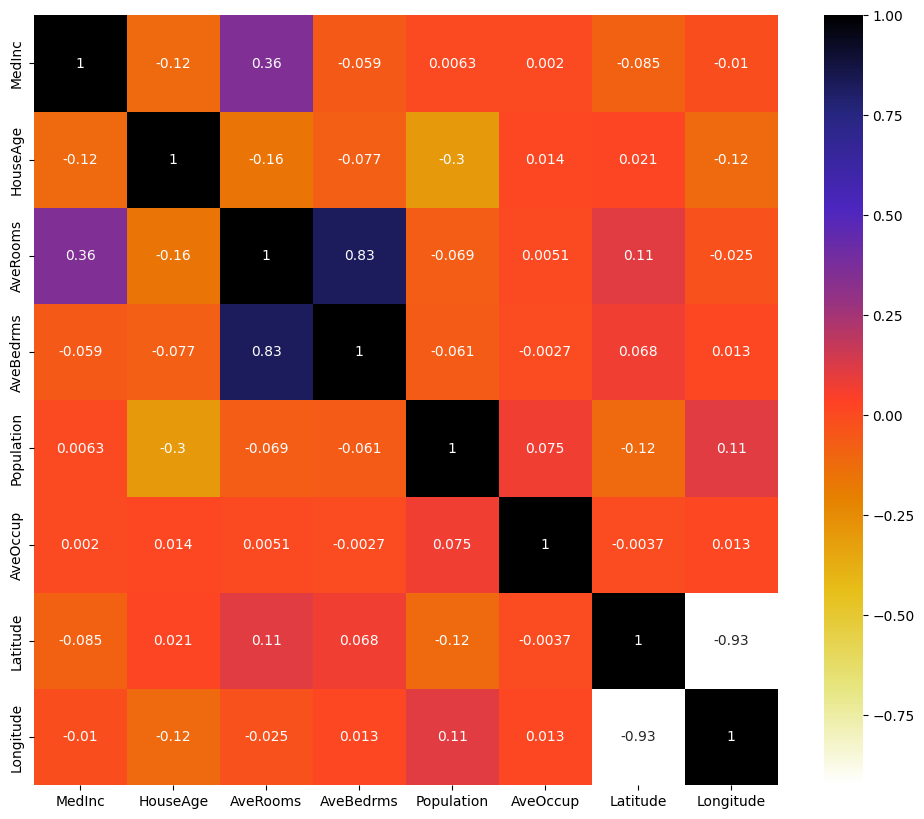

In [18]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [24]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

In [26]:
corr_features1 = correlation(X_train, 0.8)
len(set(corr_features))

2

In [27]:
corr_features2 = correlation(X_train, 0.5)
len(set(corr_features))

2

In [28]:
corr_features

{'AveBedrms', 'Longitude'}

In [30]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
14740,4.1518,22.0,5.663073,1551.0,4.180593,32.58
10101,5.7796,32.0,6.107226,1296.0,3.020979,33.92
20566,4.3487,29.0,5.930712,1554.0,2.910112,38.65
2670,2.4511,37.0,4.992958,390.0,2.746479,33.20
15709,5.0049,25.0,4.319261,649.0,1.712401,37.79
...,...,...,...,...,...,...
19681,3.0962,36.0,4.746421,1168.0,2.388548,39.15
12156,4.1386,2.0,8.821216,2826.0,3.368296,33.66
10211,7.8750,30.0,7.550926,523.0,2.421296,33.89
2445,2.0658,34.0,5.938144,363.0,3.742268,36.56


# Let try with Big Dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [ ]:
df=pd.read_csv('santander.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

In [ ]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [ ]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
X_train.drop(corr_features,axis=1)

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

X = X_train
y = y_train  # Target variable

selector = SelectKBest(score_func=f_regression, k=2)  # Select top 2 features
X_new = selector.fit_transform(X, y)

print("Selected Features:", X.columns[selector.get_support()])

Selected Features: Index(['MedInc', 'AveRooms'], dtype='object')


https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/1.%20Feature%20Selection-%20Dropping%20Constant%20Features.ipynb

In [35]:
pd.DataFrame(X_new)

,0,1
0,1.9750,2.800000
1,2.2604,3.671480
2,6.2990,6.478022
3,1.7199,2.518000
4,2.2206,4.622754
...,...,...
14443,4.4125,6.000000
14444,2.9135,5.349282
14445,3.1977,3.641221
14446,5.6315,4.540598


In [36]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
